# Projeto de Data Science

Este pequeno projeto consiste em um exercício proposto pelo curso Data Science do Zero, englobando todas as principais etapas de um projeto de classificação abordadas no curso.


**Objetivos**: Através dos Dados do Censo detectar se a renda da pessoa excede o valor de 50 mil por ano. 

**Dataset**: O conjunto de dados para este projeto é originário do Repositório de Aprendizado de Máquina da UCI (https://archive.ics.uci.edu/ml/datasets/Adult)

In [1]:
# importando libs necessárias

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style()
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\Henrique\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


# Conhecendo a base de dados

In [2]:
df = pd.read_csv('adult.data')
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
df.shape

(48842, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   education        48842 non-null  object
 3   educational-num  48842 non-null  int64 
 4   marital-status   48842 non-null  object
 5   occupation       48842 non-null  object
 6   relationship     48842 non-null  object
 7   race             48842 non-null  object
 8   sex              48842 non-null  object
 9   capital-gain     48842 non-null  int64 
 10  capital-loss     48842 non-null  int64 
 11  hours-per-week   48842 non-null  int64 
 12  native-country   48842 non-null  object
 13  income           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [5]:
df.count()

age                48842
workclass          48842
education          48842
educational-num    48842
marital-status     48842
occupation         48842
relationship       48842
race               48842
sex                48842
capital-gain       48842
capital-loss       48842
hours-per-week     48842
native-country     48842
income             48842
dtype: int64

In [6]:
df.columns

Index(['age', 'workclass', 'education', 'educational-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

**age**: Idade.

**workclass**: Classe trabalhadora. Se a pessoa é funcionário público, autônomo, empresário etc.

**education**: Níveis de Escolaridade.

**education-num**: Código do Nível de Escolaridade.

**marital-status**: Estado Civil.

**occupation**: Ocupação (Suporte técnico, Conserto de arte, Outros serviços, Vendas, Exec-managerial, Prof-specialty, Manipuladores de limpeza, Machine-op-inspct, Adm-clerical, Pesca agropecuária, Transport-moving, Priv-house-serv, Serviço de Proteção, Forças Armadas)

**relationship**: Relacionamento (Esposa, Filha Própria, Marido, Não-familiar, Outro-parente, Solteira.)

**race**: Raça (Preto, branco, asiático-Pac-Islander, Amer-Indian-Eskimo, Outro.)

**sex**: Sexo(Feminino, Masculino).

**capital-gain**: Ganho de Capital.

**capital-loss**: Perda de Capital.

**hours-per-week**: Horas de trabalho por Semana.

**native-country**: País Nativo (Estados Unidos, Camboja, Inglaterra, Porto Rico, Canadá, Alemanha, EUA (Guam-USVI-etc), Índia, México, Portugal etc)

# Análise Exploratória

**Objetivos**:
* Visualizar a distribuição das classes(variável income)
* Visualizar a distribuição das classes por nível de escolaridade, sexo e raça

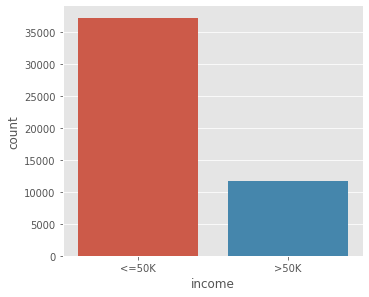

In [7]:
plt.style.use('ggplot')
sns.catplot(x = 'income',kind = 'count', data = df , height = 4,aspect = 1.25)

**Observação**: as classes estão claramente desbalanceadas, o que poderá resultar em um aprendizado pobre da classe menos frequente.

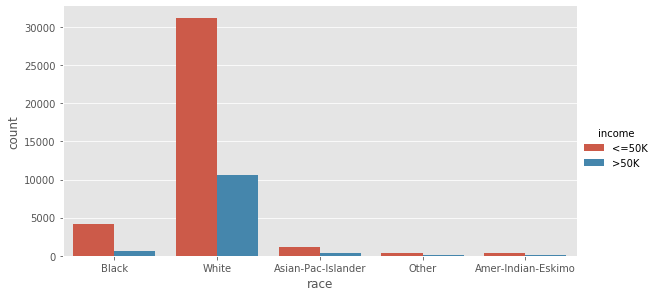

In [8]:
sns.catplot(x = 'race',kind = 'count',hue = 'income', data = df , height = 4,aspect = 2)

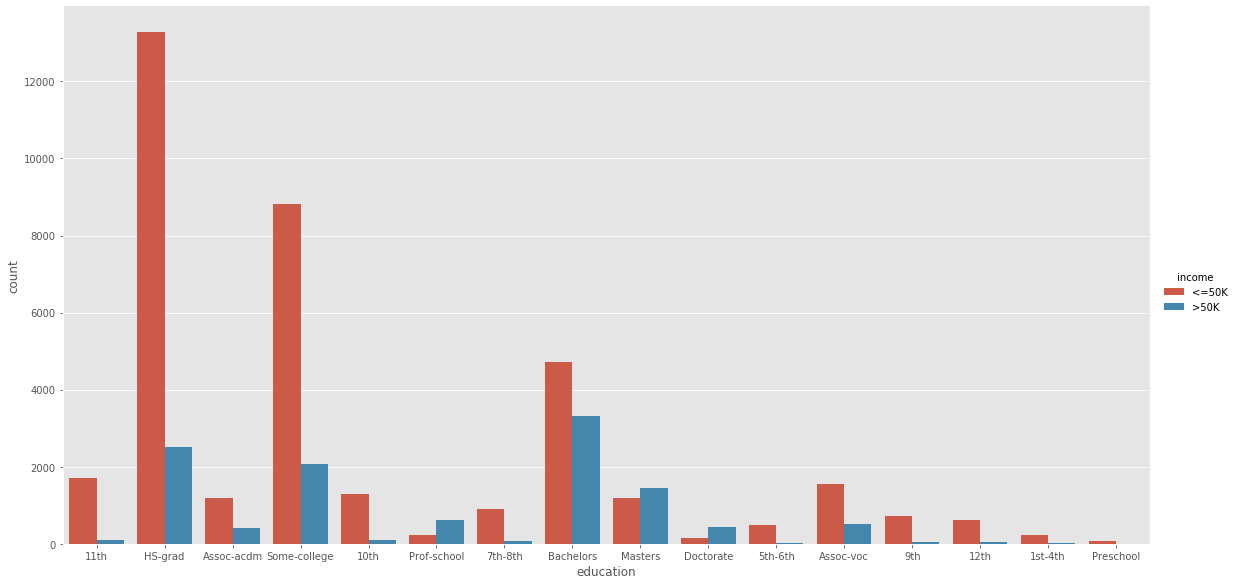

In [9]:
sns.catplot(x = 'education',kind = 'count',hue = 'income', data = df , height = 8,aspect = 2)

Observa-se que alguns poucos níveis de escolaridade têm mais pessoas que ganham acima de 50 mil dólares anuais.

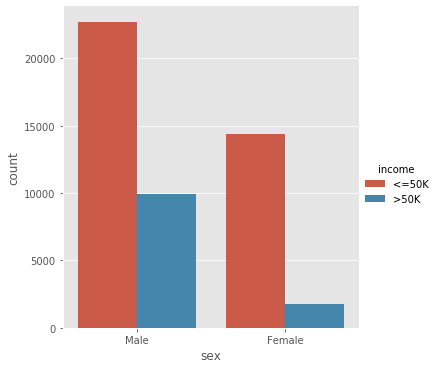

In [10]:
sns.catplot(x = 'sex',kind = 'count',hue = 'income', data = df)

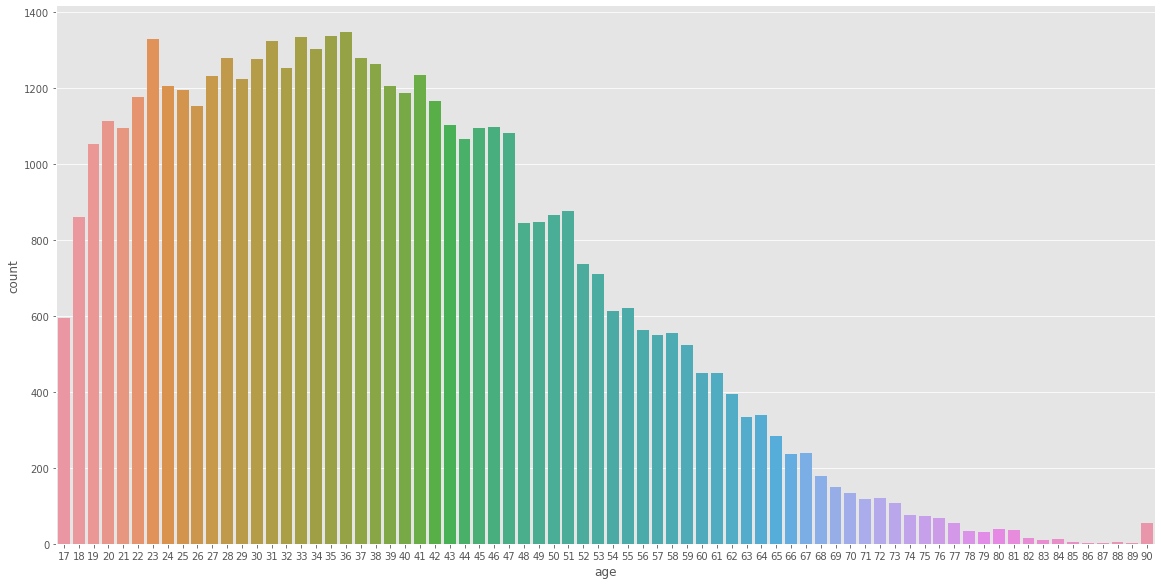

In [11]:
sns.catplot(x = 'age',kind = 'count', data = df , height = 8,aspect = 2)

# Verificação e Análise de Dados

**Objetivos:**
* Verificar a existência de missing values
* Converter colunas categóricas para numéricas.


In [12]:
df.isnull().sum()

age                0
workclass          0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

# lista com as colunas categóricas que serão substituidas por numéricas
categoricas = ['workclass', 'education','marital-status','occupation','relationship','race','sex','native-country']
new_label = ['workclass_int', 'education_int','marital-status_int','occupation_int','relationship_int','race_int','sex_int','native-country_int']

for i in range(len(categoricas)):
    inteiros = enc.fit_transform(df[categoricas[i]])
    df[new_label[i]] = inteiros
    df.drop(categoricas[i],axis=1,inplace=True)

# separando a coluna de interesse do restante do Dataset    
target = enc.fit_transform(df.income)
df.drop('income', axis = 1, inplace=True)

df.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_int,education_int,marital-status_int,occupation_int,relationship_int,race_int,sex_int,native-country_int
0,25,7,0,0,40,4,1,4,7,3,2,1,39
1,38,9,0,0,50,4,11,2,5,0,4,1,39
2,28,12,0,0,40,2,7,2,11,0,4,1,39
3,44,10,7688,0,40,4,15,2,7,0,2,1,39
4,18,10,0,0,30,0,15,4,0,3,4,0,39


# Pré-processmento de dados e aplicação do modelo

**Objetivos:**
* Aplicar algum padronizador ou normalizador nos dados numéricos
* Treinar o modelo utilizando um classificador

In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier

In [15]:
MinMax = MinMaxScaler().fit(df)
df_minmax = MinMax.transform(df)

Standard = StandardScaler().fit(df)
df_standard = Standard.transform(df)

In [16]:
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

In [17]:
#NM = NearMiss()
smt = SMOTE()
x,y = smt.fit_resample(df_standard,target)

**Observação**: Não houve diferenças significativas entre os padronizadores MinMaxScaler e StandardScaler. Porém o SMOTE foi usado para balancear as classes, com resultados bem mais satisfatórios em relação ao NearMiss.

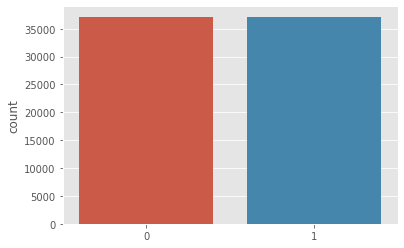

In [18]:
sns.countplot(y)
# distribuição das classes income após o balanceamento

In [19]:
from sklearn.model_selection import train_test_split

# separando dados em treino e teste
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [20]:
clf = DecisionTreeClassifier().fit(x_train,y_train)
resultado = clf.predict(x_test)

In [21]:
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))
# valores de acurácia, precisão e recall encontradas

              precision    recall  f1-score   support

           0       0.85      0.86      0.85     11037
           1       0.86      0.85      0.85     11256

    accuracy                           0.85     22293
   macro avg       0.85      0.85      0.85     22293
weighted avg       0.85      0.85      0.85     22293



In [22]:
# matriz de confusão
print(pd.crosstab(y_test,resultado, margins = True, rownames = ['real'], colnames = ['      predito']))

      predito      0      1    All
real                              
0               9464   1573  11037
1               1690   9566  11256
All            11154  11139  22293


# Tunning do modelo

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
params = {'criterion':['gini','entropy'],'max_depth':[4,10,16,22,28,34,40,46,52]}
grid = GridSearchCV(clf, params, cv=10, scoring = 'accuracy')

grid.fit(x,y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 10, 16, 22, 28, 34, 40, 46, 52]},
             scoring='accuracy')

In [25]:
# melhor acuracia obtida
grid.best_score_

0.8641501816713767

In [26]:
# parâmetros que geraram a melhor acurácia 
grid.best_params_

{'criterion': 'gini', 'max_depth': 22}

# Usando parametros do tunning

In [27]:
# repetindo o treino utilizando os melhores parâmetros 
clf = DecisionTreeClassifier(criterion='gini', max_depth=28).fit(x_train,y_train)
resultado = clf.predict(x_test)

In [28]:
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86     11037
           1       0.85      0.87      0.86     11256

    accuracy                           0.86     22293
   macro avg       0.86      0.86      0.86     22293
weighted avg       0.86      0.86      0.86     22293



In [29]:
print(pd.crosstab(y_test,resultado, margins = True, rownames = ['real'], colnames = ['      predito']))

      predito      0      1    All
real                              
0               9379   1658  11037
1               1511   9745  11256
All            10890  11403  22293
